In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import numpy as np
from EFBP import EFBPSim, minimize_squared_error

In [3]:
df = pd.read_csv("data/grid_v2.csv")
df.head()

,strategies,memory,threshold,distribution,choice,crosses,std
0,18,2.0,6000.0,uniform,mse,False,4663.133520
1,10,2.0,6000.0,uniform,mse,False,4347.765122
2,19,2.0,6000.0,uniform,mse,False,4677.982780
3,11,2.0,6000.0,uniform,mse,False,4453.358583
4,20,2.0,6000.0,uniform,mse,False,4680.575487


In [18]:
df.strategies.value_counts()

54    743
55    742
56    703
57    703
52    616
53    615
24    456
27    455
25    455
26    455
60    447
59    447
58    447
29    430
30    430
31    430
28    430
35    416
32    416
33    416
34    416
36    401
37    399
38    398
39    398
41    382
40    382
43    380
42    380
44    354
45    353
46    352
47    352
19    348
18    348
20    347
23    346
22    346
21    346
3     341
2     340
4     340
9     338
8     338
5     338
6     338
7     337
48    323
50    323
49    323
51    322
12    292
11    292
10    292
13    291
14    291
15    291
16    291
17    290
Name: strategies, dtype: int64

In [19]:
df.memory.value_counts()

3.0      291
8.0      291
5.0      291
6.0      291
2.0      291
        ... 
97.0     185
98.0     185
99.0     182
100.0    173
101.0    173
Name: memory, Length: 100, dtype: int64

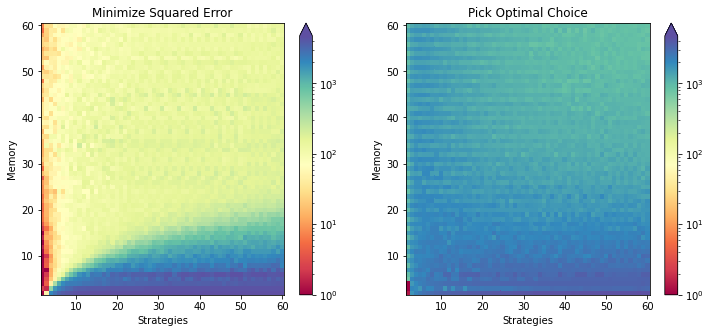

In [28]:
vmin = df["std"].max()
vmax = df["std"].max()
cmap = cm.get_cmap('Spectral')
fig, ax = plt.subplots(1,2,figsize=(12,5))

cf = "mse"

filtered = df[(df.choice == cf)  & (df.memory <= 60)]

grpd = filtered.groupby(["strategies", "memory"])["std"].mean().reset_index()

grpd.sort_values(["strategies", "memory"], inplace=True)

X = grpd.strategies.values.reshape((59,59))
Y = grpd.memory.values.reshape((59,59))
Z = grpd["std"].values.reshape((59,59))

cmap = cm.get_cmap('Spectral')

pcm = ax[0].pcolor(X, Y, Z,
                   norm=colors.LogNorm(vmin=1, vmax=vmax),
                   cmap=cmap, shading='auto')
                   
fig.colorbar(pcm, ax=ax[0], extend='max')
ax[0].title.set_text("Minimize Squared Error")
ax[0].set_xlabel("Strategies")
ax[0].set_ylabel("Memory")

cf = "choice"
filtered = df[(df.choice == cf) & (df.memory <= 60)]

grpd = filtered.groupby(["strategies", "memory"])["std"].mean().reset_index()

grpd.sort_values(["strategies", "memory"], inplace=True)

X = grpd.strategies.values.reshape((59,59))
Y = grpd.memory.values.reshape((59,59))
Z = grpd["std"].values.reshape((59,59))

cmap = cm.get_cmap('Spectral')

pcm = ax[1].pcolor(X, Y, Z,
                   norm=colors.LogNorm(vmin=1, vmax=vmax),
                   cmap=cmap, shading='auto')
                   
fig.colorbar(pcm, ax=ax[1], extend='max')
ax[1].title.set_text("Pick Optimal Choice")
ax[1].set_xlabel("Strategies")
ax[1].set_ylabel("Memory")

plt.savefig("images/grid.png")

# What happens when we run the simulation with some "good" choices

In [21]:
grpd = df.groupby(["strategies", "memory", "choice"])["std"].mean().reset_index().sort_values("std")

In [22]:
grpd.head(10)

,strategies,memory,choice,std
27,2,15.0,mse,0.157135
15,2,9.0,mse,0.157135
2,2,3.0,choice,0.300463
4,2,4.0,choice,0.372678
211,3,7.0,mse,0.476438
17,2,10.0,mse,0.483000
9,2,6.0,mse,0.681245
153,2,78.0,mse,0.816497
1,2,2.0,mse,0.899891
167,2,85.0,mse,0.942809


In [23]:
grpd[grpd.choice=="choice"].head(10)

,strategies,memory,choice,std
2,2,3.0,choice,0.300463
4,2,4.0,choice,0.372678
0,2,2.0,choice,1.386317
8979,46,101.0,choice,616.693954
9779,50,101.0,choice,625.016059
11575,59,99.0,choice,633.285317
11573,59,98.0,choice,636.441232
11355,58,89.0,choice,637.635247
11571,59,97.0,choice,637.752235
10375,53,99.0,choice,637.844069


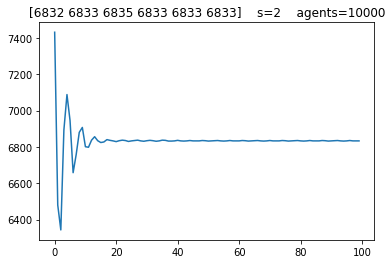

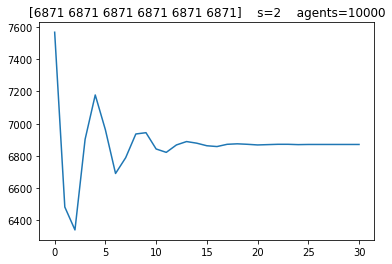

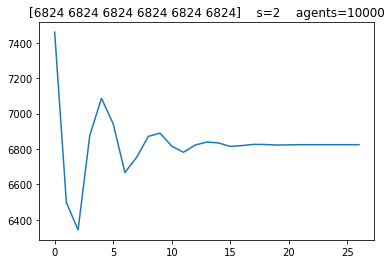

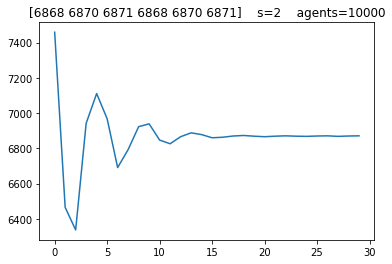

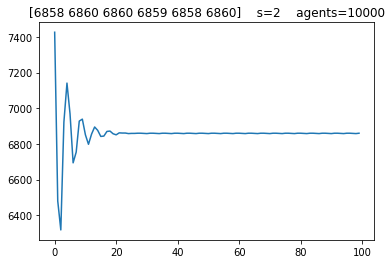

In [9]:
# why doesn't anything cross?
rng = np.random.default_rng(145)

agents = 10000
s = 2
memory = 3
n_trials=5
n_iter = max(100, memory * 3)
threshold = 0.6

h = rng.choice(agents + 1, 2 * memory)

for _ in range(n_trials):
    sim = EFBPSim(
        memory=memory, 
        strategies=s,
        threshold=threshold  * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        seed=rng.choice(100000)
    )

    plt.figure()
    plt.plot(sim.hist)
    _ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

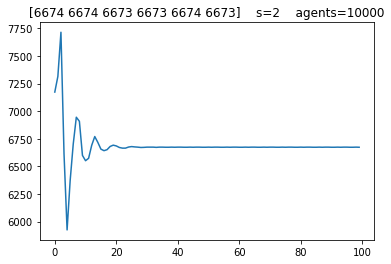

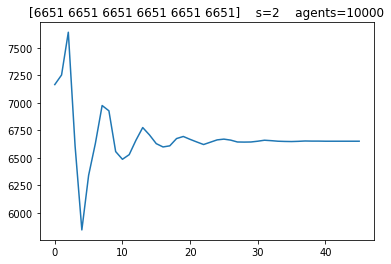

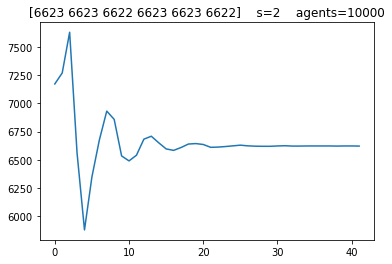

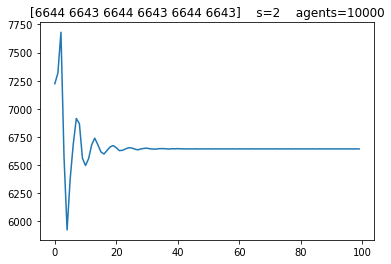

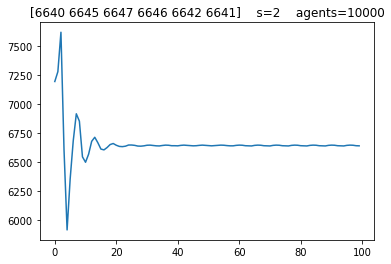

In [10]:
agents = 10000
s = 2
memory = 4
n_trials=5
n_iter = max(100, memory * 3)
threshold = 0.6

h = rng.choice(agents + 1, 2 * memory)

for _ in range(n_trials):
    sim = EFBPSim(
        memory=memory, 
        strategies=s,
        threshold=threshold  * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        seed=rng.choice(100000)
    )

    plt.figure()
    plt.plot(sim.hist)
    _ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

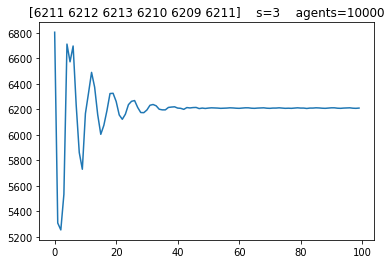

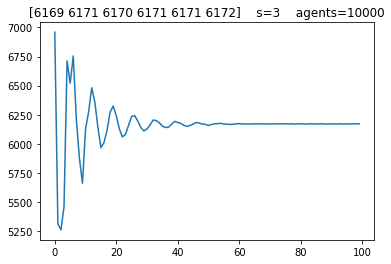

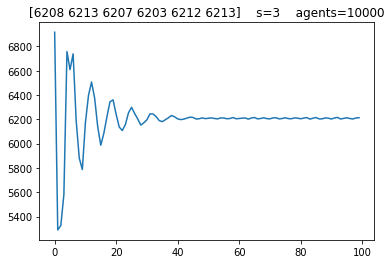

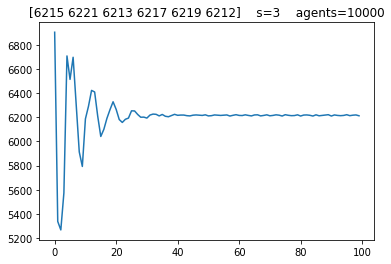

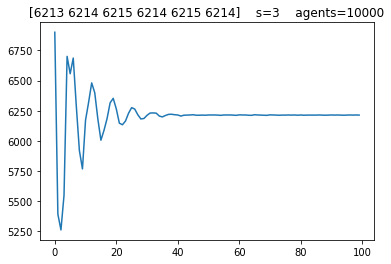

In [11]:
agents = 10000
s = 3
memory = 5
n_trials=5
n_iter = max(100, memory * 3)
threshold = 0.6

h = rng.choice(agents + 1, 2 * memory)

for _ in range(n_trials):
    sim = EFBPSim(
        memory=memory, 
        strategies=s,
        threshold=threshold  * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        seed=rng.choice(100000)
    )

    plt.figure()
    plt.plot(sim.hist)
    _ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

In [12]:
from EFBP import pick_optimal_choices

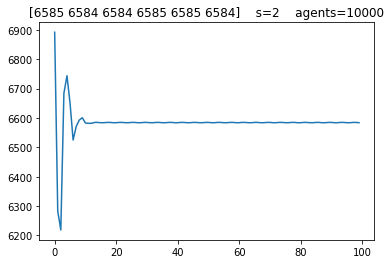

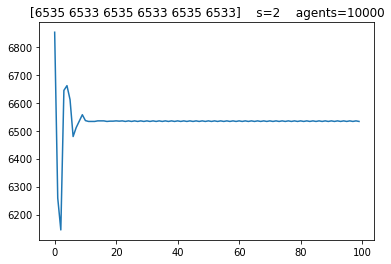

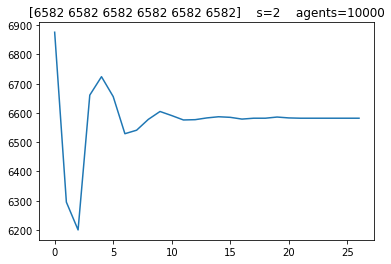

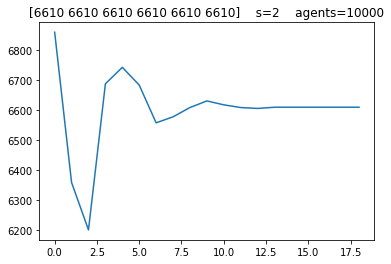

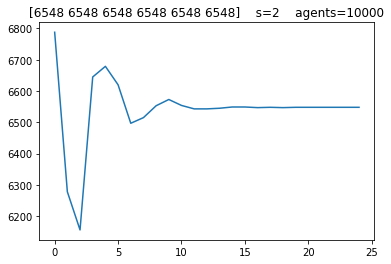

In [13]:
agents = 10000
s = 2
memory = 3
n_trials=5
n_iter = max(100, memory * 3)
threshold = 0.6

h = rng.choice(agents + 1, 2 * memory)

for _ in range(n_trials):
    sim = EFBPSim(
        memory=memory, 
        strategies=s,
        threshold=threshold  * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        best_strat_func=pick_optimal_choices,
        seed=rng.choice(100000)
    )

    plt.figure()
    plt.plot(sim.hist)
    _ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

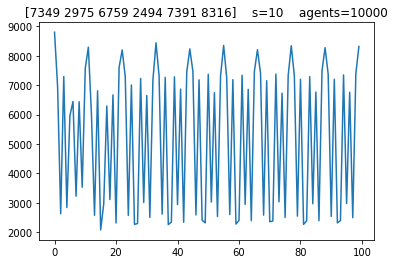

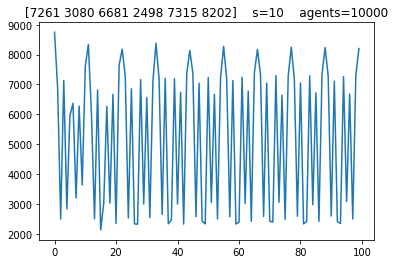

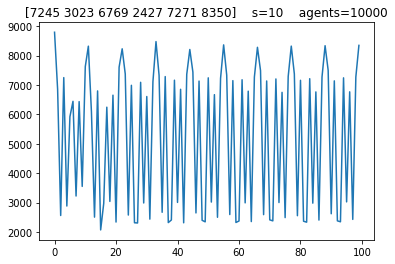

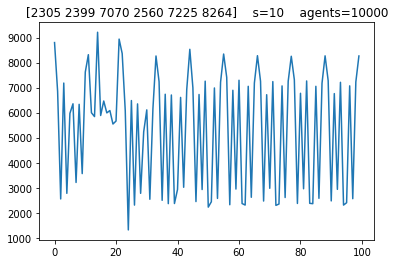

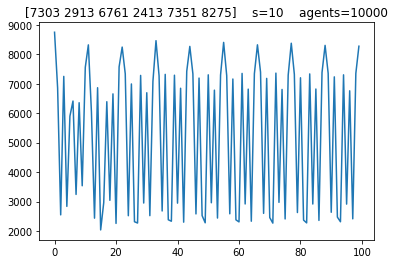

In [14]:
agents = 10000
s = 10
memory = 10
n_trials=5
n_iter = max(100, memory * 3)
threshold = 0.6

h = rng.choice(agents + 1, 2 * memory)

for _ in range(n_trials):
    sim = EFBPSim(
        memory=memory, 
        strategies=s,
        threshold=threshold  * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        best_strat_func=pick_optimal_choices,
        seed=rng.choice(100000)
    )

    plt.figure()
    plt.plot(sim.hist)
    _ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

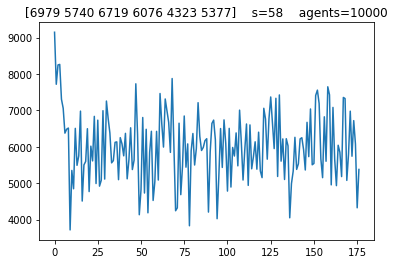

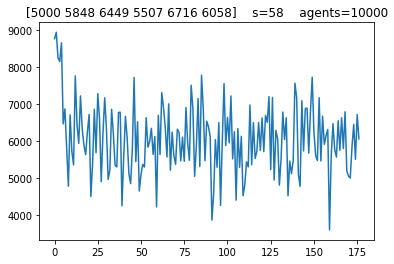

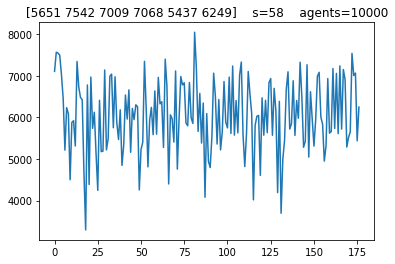

In [29]:
agents = 10000
s = 58
memory = 59
n_trials=3
n_iter = max(100, memory * 3)
threshold = 0.6


for _ in range(n_trials):
    h = rng.choice(agents + 1, 2 * memory)
    
    sim = EFBPSim(
        memory=memory, 
        strategies=s,
        threshold=threshold  * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        best_strat_func=pick_optimal_choices,
        seed=rng.choice(100000)
    )

    plt.figure()
    plt.plot(sim.hist)
    _ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

In [30]:
agents = 10000
s = 500
memory = 500
n_iter = max(100, memory * 3)
threshold = 0.6

h = rng.choice(agents + 1, 2 * memory)

sim = EFBPSim(
    memory=memory, 
    strategies=s,
    threshold=threshold  * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=pick_optimal_choices,
    seed=rng.choice(100000)
)

plt.figure()
plt.plot(sim.hist)
_ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

KeyboardInterrupt: 

In [38]:
(sim.hist > threshold * agents).mean()

0.4971751412429379

In [39]:
(sim.hist > threshold * agents).sum()

88

In [40]:
len(sim.hist)

177

In [41]:
88/177

0.4971751412429379

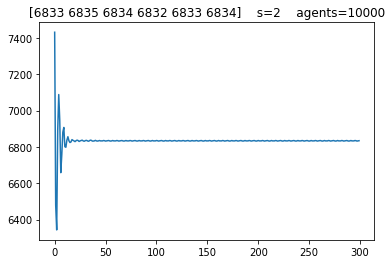

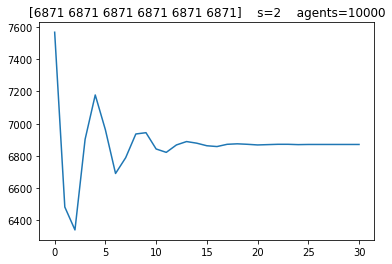

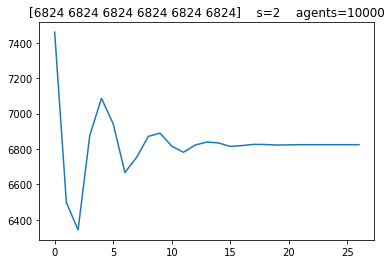

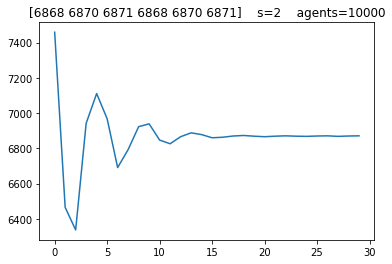

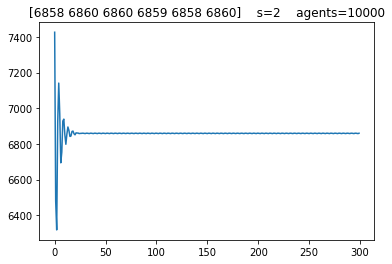

In [42]:
# why doesn't anything cross?
rng = np.random.default_rng(145)

agents = 10000
s = 2
memory = 3
n_trials=5
n_iter = max(300, memory * 3)
threshold = 0.6

h = rng.choice(agents + 1, 2 * memory)

for _ in range(n_trials):
    sim = EFBPSim(
        memory=memory, 
        strategies=s,
        threshold=threshold  * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        seed=rng.choice(100000)
    )

    plt.figure()
    plt.plot(sim.hist)
    _ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

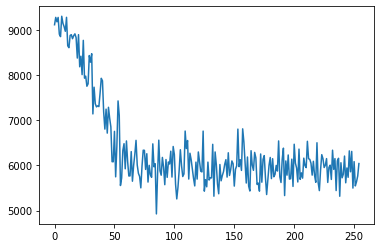

In [89]:
hh = [9115,9278,9180,9277,8906,8852,9303,9147,9071,8970,9279,8649,8607,8878,8895,8806,8873,8913,8829,8377,8895,8184,8418,8010,8769,7932,7976,7753,7807,8433,8286,8474,7140,7732,7365,7296,7320,7302,7601,7929,7873,7179,6804,7246,6715,7287,7046,6853,6083,6081,6754,5747,6421,7428,7106,5555,5722,6331,6481,5925,6542,6085,5766,5768,6306,5650,5998,6247,6555,6011,5824,5754,5503,5985,6337,6334,5911,6259,5631,6002,5791,5736,6477,5970,6037,4926,5821,6559,5880,5783,6177,5960,5573,6130,5736,6076,6031,6315,5742,6419,6240]


hh = [9115,9278,9180,9277,8906,8852,9303,9147,9071,8970,9279,8649,8607,8878,8895,8806,8873,8913,8829,8377,8895,8184,8418,8010,8769,7932,7976,7753,7807,8433,8286,8474,7140,7732,7365,7296,7320,7302,7601,7929,7873,7179,6804,7246,6715,7287,7046,6853,6083,6081,6754,5747,6421,7428,7106,5555,5722,6331,6481,5925,6542,6085,5766,5768,6306,5650,5998,6247,6555,6011,5824,5754,5503,5985,6337,6334,5911,6259,5631,6002,5791,5736,6477,5970,6037,4926,5821,6559,5880,5783,6177,5960,5573,6130,5736,6076,6031,6315,5742,6419,6240,5583,5258,5516,5890,6347,5992,5754,5812,6761,6373,6551,5698,6270,6129,5912,5712,5546,6073,5697,6298,6079,5870,5856,6760,5430,5685,5526,6073,5676,5728,5723,6467,5318,6298,6019,5587,5372,6020,5659,5774,5861,6023,6127,5741,6280,5777,5907,6099,6036,5542,5914,5991,6804,5972,6127,5889,6810,6520,6045,5610,6186,5541,5433,6326,6004,5891,6288,6168,5579,5608,5430,6253,5628,6135,6217,5735,5355,5679,6002,6176,5708,6149,5748,5802,6000,5875,6542,5748,5622,6137,6382,5332,6099,5784,6231,5697,5705,6139,5535,6469,6050,5942,5633,6361,5691,5835,5718,6161,5996,5951,6534,6148,6134,6048,5785,6091,5779,5626,6502,5620,5442,5897,6238,6149,5953,6005,6151,5623,5955,6006,5689,6337,5912,6151,5443,6100,6158,5317,6059,5726,5806,6207,5615,5944,5737,6322,5859,6310,5498,6084,5546,5637,5765,6041]
plt.plot(hh)

In [90]:
np.array(hh[50:]).std()

354.3512144758021

In [91]:
np.array(hh[75:]).std()

326.56557279256083

In [93]:
np.array(hh[100:]).std()

324.43353248873916

In [92]:
np.array(hh[150:]).std()

314.3876521552085

In [94]:
np.array(hh[200:]).std()

281.9632787767095

In [54]:
cf = "choice"
filtered = df[(df.choice == cf) & (df.memory <= 60)]

grpd = filtered.groupby(["strategies", "memory"])["std"].mean().reset_index()
grpd

,strategies,memory,std
0,2,2.0,1.386317
1,2,3.0,0.300463
2,2,4.0,0.372678
3,2,5.0,745.679034
4,2,6.0,915.099264
...,...,...,...
3476,60,56.0,859.655145
3477,60,57.0,844.609027
3478,60,58.0,917.705632
3479,60,59.0,816.944335


In [57]:
grpd[grpd["std"] > 10].sort_values("std").head(20)

,strategies,memory,std
3,2,5.0,745.679034
2594,45,59.0,777.115815
2765,48,53.0,783.780885
2358,41,59.0,789.709273
2583,45,48.0,808.269406
2704,47,51.0,808.803946
2347,41,48.0,811.184854
3479,60,59.0,816.944335
2829,49,58.0,817.035257
2476,43,59.0,817.451896


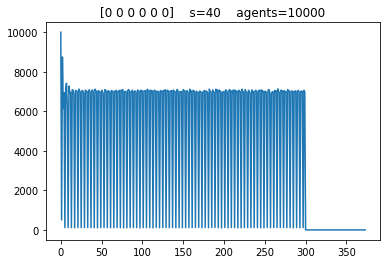

In [65]:
s = 40
m = 40

h = np.array([6000, 5999] * 40)


sim = EFBPSim(
    memory=memory, 
    strategies=s,
    threshold=threshold  * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=pick_optimal_choices,
    seed=rng.choice(77777)
)

plt.figure()
plt.plot(sim.hist)
_ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

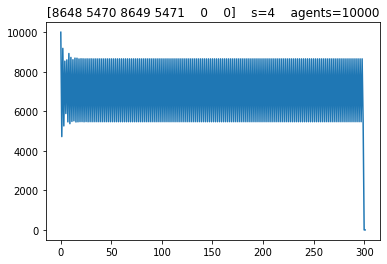

In [68]:
s = 4
m = 4

h = np.array([6000, 5999] * m)


sim = EFBPSim(
    memory=memory, 
    strategies=s,
    threshold=threshold  * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=pick_optimal_choices,
    seed=rng.choice(77777)
)

plt.figure()
plt.plot(sim.hist)
_ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

In [69]:
sim.hist

array([9994, 4718, 9179, 5258, 8533, 5884, 8597, 5462, 8919, 5372, 8720,
       5485, 8606, 5515, 8687, 5456, 8681, 5464, 8644, 5474, 8655, 5475,
       8652, 5466, 8647, 5477, 8651, 5468, 8648, 5472, 8652, 5470, 8647,
       5471, 8649, 5471, 8648, 5470, 8649, 5471, 8648, 5470, 8648, 5471,
       8648, 5470, 8649, 5471, 8648, 5470, 8649, 5471, 8648, 5470, 8649,
       5471, 8648, 5470, 8649, 5471, 8649, 5470, 8649, 5471, 8649, 5470,
       8649, 5471, 8648, 5470, 8648, 5471, 8649, 5470, 8648, 5470, 8649,
       5471, 8649, 5470, 8648, 5470, 8649, 5471, 8649, 5470, 8649, 5471,
       8649, 5470, 8649, 5471, 8649, 5470, 8648, 5470, 8649, 5471, 8649,
       5470, 8649, 5471, 8648, 5470, 8649, 5471, 8649, 5470, 8648, 5470,
       8649, 5471, 8649, 5470, 8649, 5471, 8649, 5470, 8649, 5471, 8649,
       5470, 8649, 5471, 8649, 5470, 8649, 5471, 8649, 5470, 8648, 5470,
       8649, 5471, 8649, 5470, 8649, 5471, 8649, 5470, 8649, 5471, 8649,
       5470, 8648, 5470, 8649, 5471, 8648, 5470, 86

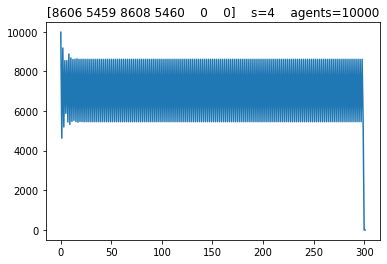

In [70]:
s = 4
m = 4

h = np.array([6050, 5949] * m)


sim = EFBPSim(
    memory=memory, 
    strategies=s,
    threshold=threshold  * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=pick_optimal_choices,
    seed=rng.choice(77777)
)

plt.figure()
plt.plot(sim.hist)
_ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

In [71]:
sim.hist

array([9973, 4628, 9177, 5193, 8539, 5875, 8542, 5444, 8872, 5326, 8675,
       5477, 8599, 5524, 8610, 5463, 8632, 5438, 8607, 5471, 8608, 5462,
       8610, 5457, 8606, 5461, 8607, 5460, 8607, 5460, 8607, 5459, 8607,
       5460, 8607, 5460, 8605, 5460, 8609, 5459, 8607, 5460, 8605, 5461,
       8607, 5460, 8609, 5459, 8605, 5460, 8609, 5460, 8606, 5459, 8607,
       5461, 8605, 5458, 8610, 5460, 8606, 5459, 8608, 5460, 8606, 5460,
       8608, 5458, 8606, 5461, 8608, 5458, 8607, 5460, 8607, 5460, 8606,
       5460, 8608, 5459, 8609, 5461, 8604, 5459, 8607, 5460, 8608, 5460,
       8605, 5460, 8607, 5460, 8609, 5458, 8605, 5460, 8608, 5461, 8607,
       5459, 8608, 5461, 8603, 5459, 8609, 5461, 8608, 5458, 8609, 5460,
       8605, 5459, 8608, 5461, 8607, 5458, 8608, 5460, 8606, 5460, 8607,
       5459, 8608, 5460, 8606, 5461, 8606, 5460, 8607, 5459, 8608, 5460,
       8607, 5459, 8607, 5460, 8606, 5461, 8606, 5459, 8609, 5460, 8605,
       5460, 8609, 5461, 8607, 5458, 8607, 5461, 86

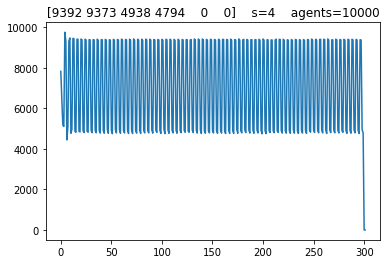

In [72]:
s = 4
m = 4

h = np.array([9000, 3999] * m)


sim = EFBPSim(
    memory=memory, 
    strategies=s,
    threshold=threshold  * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=pick_optimal_choices,
    seed=rng.choice(77777)
)

plt.figure()
plt.plot(sim.hist)
_ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

In [73]:
sim.hist

array([7826, 6566, 5183, 5107, 9759, 9322, 4442, 5071, 9320, 9479, 4769,
       4956, 9453, 9444, 4860, 4821, 9413, 9417, 4865, 4838, 9424, 9387,
       4895, 4805, 9415, 9382, 4872, 4824, 9394, 9385, 4906, 4799, 9397,
       9379, 4912, 4794, 9416, 9365, 4897, 4780, 9395, 9390, 4909, 4774,
       9406, 9377, 4961, 4772, 9390, 9369, 4913, 4750, 9408, 9367, 4942,
       4788, 9403, 9373, 4947, 4773, 9420, 9374, 4912, 4784, 9401, 9380,
       4932, 4760, 9415, 9359, 4932, 4760, 9427, 9364, 4908, 4778, 9414,
       9372, 4928, 4764, 9414, 9365, 4905, 4788, 9420, 9384, 4889, 4791,
       9416, 9371, 4931, 4778, 9401, 9377, 4919, 4816, 9405, 9377, 4917,
       4767, 9407, 9368, 4968, 4754, 9414, 9384, 4930, 4769, 9413, 9370,
       4921, 4789, 9406, 9353, 4913, 4771, 9412, 9363, 4908, 4804, 9402,
       9379, 4916, 4819, 9396, 9391, 4863, 4822, 9376, 9397, 4932, 4807,
       9426, 9394, 4917, 4780, 9424, 9374, 4932, 4762, 9425, 9380, 4884,
       4774, 9406, 9366, 4887, 4793, 9411, 9384, 49

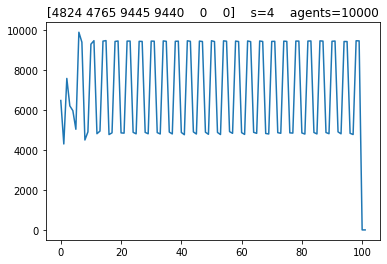

In [87]:
s = 4
m = 4
n_iter=100

h = np.array([9990, 9990, 1000, 1000] * (m//2))


sim = EFBPSim(
    memory=memory, 
    strategies=s,
    threshold=threshold  * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=pick_optimal_choices,
    seed=rng.choice(77777)
)

plt.figure()
plt.plot(sim.hist)
_ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

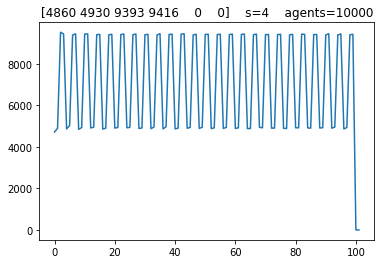

In [88]:
s = 4
m = 4
n_iter=100

h = np.array([8600, 8600, 5500, 5500] * (m//2))


sim = EFBPSim(
    memory=memory, 
    strategies=s,
    threshold=threshold  * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=pick_optimal_choices,
    seed=rng.choice(77777)
)

plt.figure()
plt.plot(sim.hist)
_ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

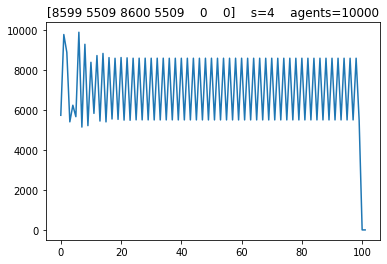

In [83]:
s = 4
m = 4
n_iter=100

h = np.array([9990, 1000] * m)


sim = EFBPSim(
    memory=memory, 
    strategies=s,
    threshold=threshold  * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=pick_optimal_choices,
    seed=rng.choice(77777)
)

plt.figure()
plt.plot(sim.hist)
_ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

In [84]:
sim.hist

array([5741, 9787, 8895, 5413, 6245, 5672, 9901, 5151, 9298, 5223, 8396,
       5837, 8733, 5453, 8840, 5411, 8631, 5555, 8598, 5537, 8635, 5499,
       8618, 5492, 8600, 5512, 8602, 5510, 8603, 5510, 8600, 5507, 8602,
       5508, 8602, 5509, 8599, 5510, 8600, 5509, 8599, 5509, 8600, 5509,
       8600, 5509, 8599, 5509, 8600, 5509, 8600, 5509, 8599, 5509, 8600,
       5509, 8599, 5509, 8600, 5509, 8600, 5509, 8599, 5509, 8600, 5509,
       8600, 5509, 8599, 5509, 8600, 5509, 8599, 5509, 8600, 5509, 8600,
       5509, 8599, 5509, 8600, 5509, 8600, 5509, 8599, 5509, 8600, 5509,
       8600, 5509, 8599, 5509, 8600, 5509, 8600, 5509, 8599, 5509, 8600,
       5509,    0,    0])

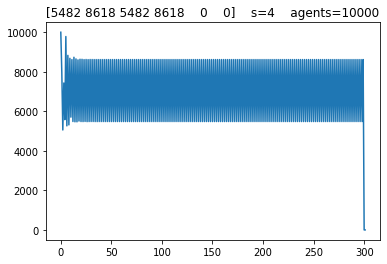

In [81]:
s = 4
m = 4

h = np.array([1000, 3999] * m)


sim = EFBPSim(
    memory=memory, 
    strategies=s,
    threshold=threshold  * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=pick_optimal_choices,
    seed=rng.choice(77777)
)

plt.figure()
plt.plot(sim.hist)
_ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

In [82]:
sim.hist

array([10000,  7981,  5056,  7432,  5577,  9783,  5264,  8829,  5314,
        8681,  5705,  8616,  5485,  8734,  5469,  8651,  5468,  8601,
        5508,  8634,  5483,  8631,  5480,  8615,  5488,  8622,  5478,
        8615,  5482,  8621,  5484,  8620,  5484,  8618,  5481,  8618,
        5480,  8618,  5482,  8618,  5482,  8618,  5482,  8618,  5482,
        8618,  5482,  8618,  5482,  8618,  5482,  8618,  5482,  8618,
        5482,  8618,  5482,  8618,  5482,  8618,  5482,  8618,  5482,
        8618,  5482,  8618,  5482,  8618,  5482,  8618,  5482,  8618,
        5482,  8618,  5482,  8618,  5482,  8618,  5482,  8618,  5482,
        8618,  5482,  8618,  5482,  8618,  5482,  8618,  5482,  8618,
        5482,  8618,  5482,  8618,  5482,  8618,  5482,  8618,  5482,
        8618,  5482,  8618,  5482,  8618,  5482,  8618,  5482,  8618,
        5482,  8618,  5482,  8618,  5482,  8618,  5482,  8618,  5482,
        8618,  5482,  8618,  5482,  8618,  5482,  8618,  5482,  8618,
        5482,  8618,

In [66]:
s = 40
m = 40

h = np.array([6050, 5949] * 40)


sim = EFBPSim(
    memory=memory, 
    strategies=s,
    threshold=threshold  * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=pick_optimal_choices,
    seed=rng.choice(77777)
)

plt.figure()
plt.plot(sim.hist)
_ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

KeyboardInterrupt: 

In [ ]:
s = 40
m = 40

h = np.array([6100, 5899] * 40)


sim = EFBPSim(
    memory=memory, 
    strategies=s,
    threshold=threshold  * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=pick_optimal_choices,
    seed=rng.choice(77777)
)

plt.figure()
plt.plot(sim.hist)
_ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

In [ ]:
s = 40
m = 40

h = np.array([7000, 4999] * 40)


sim = EFBPSim(
    memory=memory, 
    strategies=s,
    threshold=threshold  * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=pick_optimal_choices,
    seed=rng.choice(77777)
)

plt.figure()
plt.plot(sim.hist)
_ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

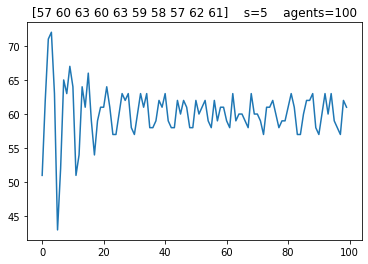

In [7]:
s = 5
memory = 5
threshold=0.6
agents=100
n_iter = 100

rng=np.random.default_rng()

h = rng.choice(agents+1, size=2*m)


sim = EFBPSim(
    memory=memory, 
    strategies=s,
    threshold=threshold  * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(77777)
)

plt.figure()
plt.plot(sim.hist)
_ = plt.title(f"{sim.hist[-10:]}    s={s}    agents={agents}")

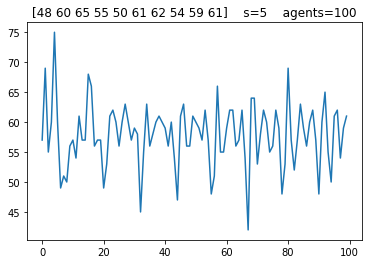

In [12]:
s = 5
memory = 10
threshold=0.6
agents=100
n_iter = 100

rng=np.random.default_rng(43)

h = rng.choice(agents+1, size=2*memory)


sim = EFBPSim(
    memory=memory, 
    strategies=s,
    threshold=threshold  * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(77777)
)

plt.figure()
plt.plot(sim.hist)
_ = plt.title(f"{sim.hist[-10:]}    s={s}    agents={agents}")

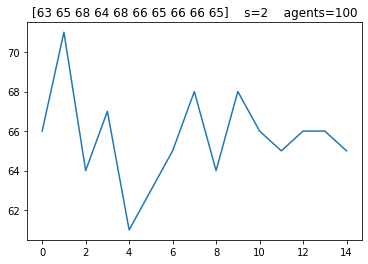

In [13]:
s = 2
memory = 5
threshold=0.6
agents=100
n_iter = 100

h = rng.choice(agents+1, size=2*memory)


sim = EFBPSim(
    memory=memory, 
    strategies=s,
    threshold=threshold  * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(77777)
)

plt.figure()
plt.plot(sim.hist)
_ = plt.title(f"{sim.hist[-10:]}    s={s}    agents={agents}")

In [14]:
sim.hist

array([66, 71, 64, 67, 61, 63, 65, 68, 64, 68, 66, 65, 66, 66, 65])

In [99]:
def minimize_absoluute_error(rng,predictions,observations,threshold,strategies):
        # calculate the absolute error of predictions
        # here, we discard the rightmost prediction as
        # this is the prediction for the future.
        # if we knew the correct answer for that,
        # we wouldn't need to predict it!
        errs = np.abs(predictions[:, :-1] - observations).sum(axis=1)

        return np.argmin(errs)
    
    

In [ ]:
s = 5
m = 5

h = np.array([6050, 5949] * m)


sim = EFBPSim(
    memory=memory, 
    strategies=s,
    threshold=threshold  * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_absolute_error,
    seed=rng.choice(77777)
)

plt.figure()
plt.plot(sim.hist)
_ = plt.title(f"{sim.hist[-10:]}    s={s}    agents={agents}")

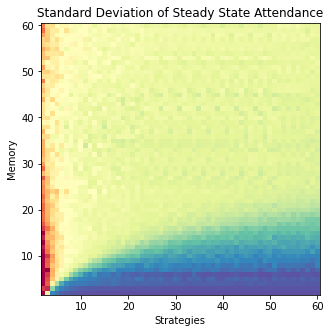

In [15]:
vmin = df["std"].max()
vmax = df["std"].max()
cmap = cm.get_cmap('Spectral')
plt.figure(figsize=(5,5))

cf = "mse"

filtered = df[(df.choice == cf)  & (df.memory <= 60)]

grpd = filtered.groupby(["strategies", "memory"])["std"].mean().reset_index()

grpd.sort_values(["strategies", "memory"], inplace=True)

X = grpd.strategies.values.reshape((59,59))
Y = grpd.memory.values.reshape((59,59))
Z = grpd["std"].values.reshape((59,59))

cmap = cm.get_cmap('Spectral')

pcm = plt.pcolor(X, Y, Z,
                   norm=colors.LogNorm(vmin=1, vmax=vmax),
                   cmap=cmap, shading='auto')
                   
fig.colorbar(pcm, ax=ax, extend='max')
plt.title("Standard Deviation of Steady State Attendance")
plt.xlabel("Strategies")
plt.ylabel("Memory")

plt.savefig("Grid_mse.png")

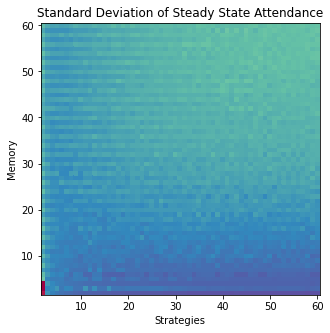

In [17]:
vmin = df["std"].max()
vmax = df["std"].max()
cmap = cm.get_cmap('Spectral')
plt.figure(figsize=(5,5))

cf = "choice"

filtered = df[(df.choice == cf)  & (df.memory <= 60)]

grpd = filtered.groupby(["strategies", "memory"])["std"].mean().reset_index()

grpd.sort_values(["strategies", "memory"], inplace=True)

X = grpd.strategies.values.reshape((59,59))
Y = grpd.memory.values.reshape((59,59))
Z = grpd["std"].values.reshape((59,59))

cmap = cm.get_cmap('Spectral')

pcm = plt.pcolor(X, Y, Z,
                   norm=colors.LogNorm(vmin=1, vmax=vmax),
                   cmap=cmap, shading='auto')
                   
fig.colorbar(pcm, ax=ax, extend='max')
plt.title("Standard Deviation of Steady State Attendance")
plt.xlabel("Strategies")
plt.ylabel("Memory")

plt.savefig("Grid_choice.png")